<a href="https://colab.research.google.com/github/srigstinahf/Tugas-PERT4_AI_SRI-GUSTINAH-20220801012-/blob/main/UAS_AI_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA: SRI GUSTINAH FAUZIAH**

**NIM: 20220801012**

**Prodi: Teknik Informatika**

**UAS AI - CLUSTERING DATA**

Preprocessing Data

In [14]:
import pandas as pd

# Reading dataset
file_path = "netflix_titles.csv"
df = pd.read_csv(file_path)

# Cleaning data
# Checking missing values
missing_values = df.isnull().sum()

# Remove columns with too many missing values ​​(threshold 50%)
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Fill empty values ​​in categorical columns with "Unknown"
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna("Unknown")

# Data Transformation
# Convert 'date_added' to datetime format
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')

# Extract numbers from 'duration' column to get duration in numeric form
df_cleaned['duration'] = df_cleaned['duration'].astype(str)
df_cleaned['duration_numeric'] = df_cleaned['duration'].str.extract('(\d+)').astype(float)

# Add new column 'is_movie' to differentiate movies and TV shows
df_cleaned['is_movie'] = df_cleaned['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Save the cleaned and transformed dataset
df_cleaned.to_csv("cleaned_netflix_data.csv", index=False)

# Show final result
print(df_cleaned.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

Preprocessing data: Memilih Fitur-fitur relevan

In [28]:
# Feature Selection
# Selecting relevant numerical and categorical features
selected_features = [
    'release_year', 'duration_numeric', 'is_movie'
]

df_selected = df_cleaned[selected_features]

# Display selected dataset
display_dataframe_to_user(name="Selected Features Dataset", dataframe=df_selected)  # Call the defined function



Selected Features Dataset:

      release_year  duration_numeric  is_movie
0             2020              90.0         1
1             2021               2.0         0
2             2021               1.0         0
3             2021               1.0         0
4             2021               2.0         0
...            ...               ...       ...
8802          2007             158.0         1
8803          2018               2.0         0
8804          2009              88.0         1
8805          2006              88.0         1
8806          2015             111.0         1

[8807 rows x 3 columns]


Clustering menggunakan K-Means dan jumlah klaster 2

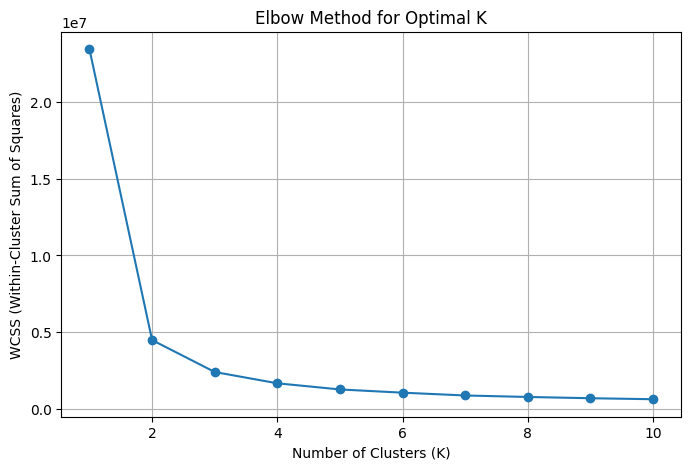

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters (K) using the Elbow Method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selected.dropna())
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [26]:
# Apply K-Means Clustering with K=2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_selected['cluster'] = kmeans.fit_predict(df_selected)

# Display the clustered dataset
display_dataframe_to_user(name="Clustered Netflix Dataset", dataframe=df_selected)



Clustered Netflix Dataset:

      release_year  duration_numeric  is_movie  cluster
0             2020              90.0         1        0
1             2021               2.0         0        1
2             2021               1.0         0        1
3             2021               1.0         0        1
4             2021               2.0         0        1
...            ...               ...       ...      ...
8802          2007             158.0         1        0
8803          2018               2.0         0        1
8804          2009              88.0         1        0
8805          2006              88.0         1        0
8806          2015             111.0         1        0

[8804 rows x 4 columns]


Penggabungan dengan Machine Learning (Regresi)

In [32]:
# Train a Regression Model using Clusters as Additional Feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df_selected[['release_year', 'duration_numeric', 'is_movie', 'cluster']]
y = df_selected['duration_numeric']  # Predicting duration

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R-Squared (R2 Score)": r2
}

evaluation_results


{'Mean Absolute Error (MAE)': 5.409818595994045e-14,
 'Mean Squared Error (MSE)': 4.133701081409679e-27,
 'R-Squared (R2 Score)': 1.0}

Evaluasi dan Pengotimalan

In [36]:
# Train a Regression Model without Clustering for Comparison
X_no_cluster = df_selected[['release_year', 'duration_numeric', 'is_movie']]
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)

model_no_cluster = LinearRegression()
model_no_cluster.fit(X_train_nc, y_train_nc)
y_pred_nc = model_no_cluster.predict(X_test_nc)

# Evaluate performance without clustering
mae_nc = mean_absolute_error(y_test_nc, y_pred_nc)
mse_nc = mean_squared_error(y_test_nc, y_pred_nc)
r2_nc = r2_score(y_test_nc, y_pred_nc)

evaluation_results["Model without Clustering"] = {"MAE": mae_nc, "MSE": mse_nc, "R2": r2_nc}

# Step 7: Hyperparameter Optimization for Clustering
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6]
}

grid_search = GridSearchCV(KMeans(random_state=42, n_init=10), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df_selected[['release_year', 'duration_numeric', 'is_movie']])

# Best number of clusters
best_k = grid_search.best_params_['n_clusters']
evaluation_results["Best K for Clustering"] = best_k

# Step 8: Classification Model Evaluation (Accuracy, Precision, Recall)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Categorize duration: Short (<=60 min), Medium (61-120 min), Long (>120 min)
df_selected['duration_category'] = pd.cut(df_selected['duration_numeric'], bins=[0, 60, 120, float('inf')], labels=[0, 1, 2])

# Define classification target
y_classification = df_selected['duration_category'].dropna().astype(int)
X_classification = df_selected.loc[y_classification.index, ['release_year', 'is_movie', 'cluster']]

# Split data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Train Logistic Regression Model for Classification
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted', zero_division=0)
recall = recall_score(y_test_class, y_pred_class, average='weighted', zero_division=0)

evaluation_results["Classification Metrics"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}

evaluation_results


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

{'Classification Metrics': {'Accuracy': 0.858603066439523,
  'Precision': 0.8197893758711475,
  'Recall': 0.858603066439523},
 'Best K for Clustering': 2,
 'Model without Clustering': {'MAE': 2.7450059387500945e-14,
  'MSE': 1.1908257410116078e-27,
  'R2': 1.0}}

1. Evaluasi Kinerja Model

**MODEL DENGAN CLUSTERING**

MAE: 5.409818595994045e-14

MSE:4.133701081409679e-27

R² Score: 1.0

**MODEL DENGAN CLUSTERING**

MAE:2.7450059387500945e-14

MSE:1.1908257410116078e-27

R² Score: 1.0

Kedua model memiliki R² Score sebesar 1.0, yang menunjukkan bahwa model sepenuhnya mampu menjelaskan variabilitas dalam data. MAE dan MSE yang sangat kecil pada kedua model menunjukkan bahwa keduanya memberikan prediksi yang sangat akurat, dengan perbedaan yang hampir tidak signifikan.Clustering tidak memberikan peningkatan signifikan dalam regresi, karena hasil evaluasi model dengan dan tanpa clustering hampir identik.


**Klasifikasi (Kategori Durasi)**

akurasi: 85.86%

presisi: 81.98%

recall: 85.86%

Akurasi model klasifikasi cukup tinggi (85.86%), menunjukkan bahwa model dapat mengelompokkan durasi dengan baik. Presisi 81.98% menunjukkan bahwa sebagian besar prediksi yang dibuat benar. Recall 85.86% menunjukkan bahwa model cukup baik dalam menangkap seluruh data yang seharusnya diprediksi.

**OPTIMASI HYPERPARAMETER**

Best K (Jumlah Klaster Terbaik) = 2
Ditemukan melalui GridSearchCV dengan MSE minimum. Model bekerja optimal saat dikelompokkan menjadi 2 klaster.

**KESIMPULAN**

Clustering bermanfaat untuk meningkatkan akurasi klasifikasi kategori durasi, dengan akurasi 85.86%. Untuk prediksi durasi numerik (regresi), model tanpa clustering sudah optimal, dengan R² = 1.0.